## Second function: Calculating differences between years

** The objective of the function is to calculate the difference in rainfall between two time periods (e.g. months, seasons, years).**

The function will be of the type:
```
def diff(file1, file2, descriptive title, figure):
    get precipitation data from file1
    get precipitation data from file2
    calculate difference in values (file2 - file1)
    
    # the rest of this function is optional. it's only included to show the final output.
    using matplotlib display map of precipitation 
    provide title to the figure
    save map 
    display map
```
** A sample figure is shown at the end of the function. The map shows areas where there are increases in rainfall (green and blue), and decreases in rainfall (yellow and brown colors). The map indicates large areas with lower rainfall in December, particularly in Indonesia and the Western Pacific, consistent with El Nino conditions. Some parts of Southern Asia, equatorial Africa and Central America experienced higher rainfall, again consistent with El Nino conditions. **

--
Note: An error message is displayed due to a deprecation problem. This is a known error, but data are stored correctly.

In [1]:
# importing modules and libraries
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py as h5py

# Creating a function to read precipitation data from files
def readPrecip(file_path):
    #this function reads precipitation data from a hdf5 file
    file = h5py.File(file_path, 'r') 
    precip = file['Grid/precipitation'][:]
    precip = np.transpose(precip)
    # assign geography to values
    theLats = file['Grid/lat'][:]
    theLons = file['Grid/lon'][:]
    return[precip, theLats, theLons]

In [2]:
def precipDifference(file1, file2, title_name, figure_path):
    # the function calculates the difference between file12 and file1
    
    # read precipitation data from file1
    precip1,theLats1,theLons1 = readPrecip(file1)
    
    #repeat for file2
    precip2,theLats2,theLons2 = readPrecip(file2)
    
    # calculate difference
    precipdiff = np.subtract(precip2, precip1)
    
    # The code ends here. The rest plots the data onto a map.
    # Plot the figure, define the geographic bounds
    fig = plt.figure(dpi=300)
    latcorners = ([-60,60])
    loncorners = ([-180,180])

    m = Basemap(projection='cyl',llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

    # Draw coastlines, state and country boundaries, edge of map.

    m.drawcoastlines()
    # m.drawstates()
    m.drawcountries()

    # Draw filled contours.
    # first, we set the min and max values based on the data. The maximum and minimum differences are known.
    clevs = np.arange(-1.25,1.26,0.25)

    # If we wanted to replicate the process without knowing the max and min values, we could use the following
#     MIN = np.amin(precipdiff)
#     MAX = np.amax(precipdiff)
#     clevs = np.arange(MIN,MAX,0.5)
    
    # Define the latitude and longitude data
    x, y = np.float32(np.meshgrid(theLons2, theLats2))
    #X, Y = np.meshgrid(x,y)
    
    # Mask values where difference is too large (one of the datafiles did not have any data)
    masked_array = np.ma.masked_where(precipdiff < -5,precipdiff) 
    
    # Plot every masked value as white
    cmap = plt.cm.RdBu
    cmap.set_bad('w',1.)

    # Plot the data
    cs = m.contourf(x,y,precipdiff,clevs,cmap=cmap,latlon=True)
    #m.contourf(data = precip, x = X, y = Y)
    parallels = np.arange(-60.,61,20.)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(-180.,180.,60.)
    m.drawmeridians(meridians,labels=[False,False,False,True])

    #Set the title and fonts
    plt.title(title_name)
    font = {'weight' : 'bold', 'size' : 6}
    plt.rc('font', **font)

    #Add colorbar
    cbar = m.colorbar(cs,location='right',pad="5%")
    cbar.set_label('mm/h')
    plt.savefig(figure_path,dpi=200)

    # included here to demonstrate the final output.
    image = mpimg.imread(figure_path)
    plt.imshow(image)
    plt.show(image)
    

/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


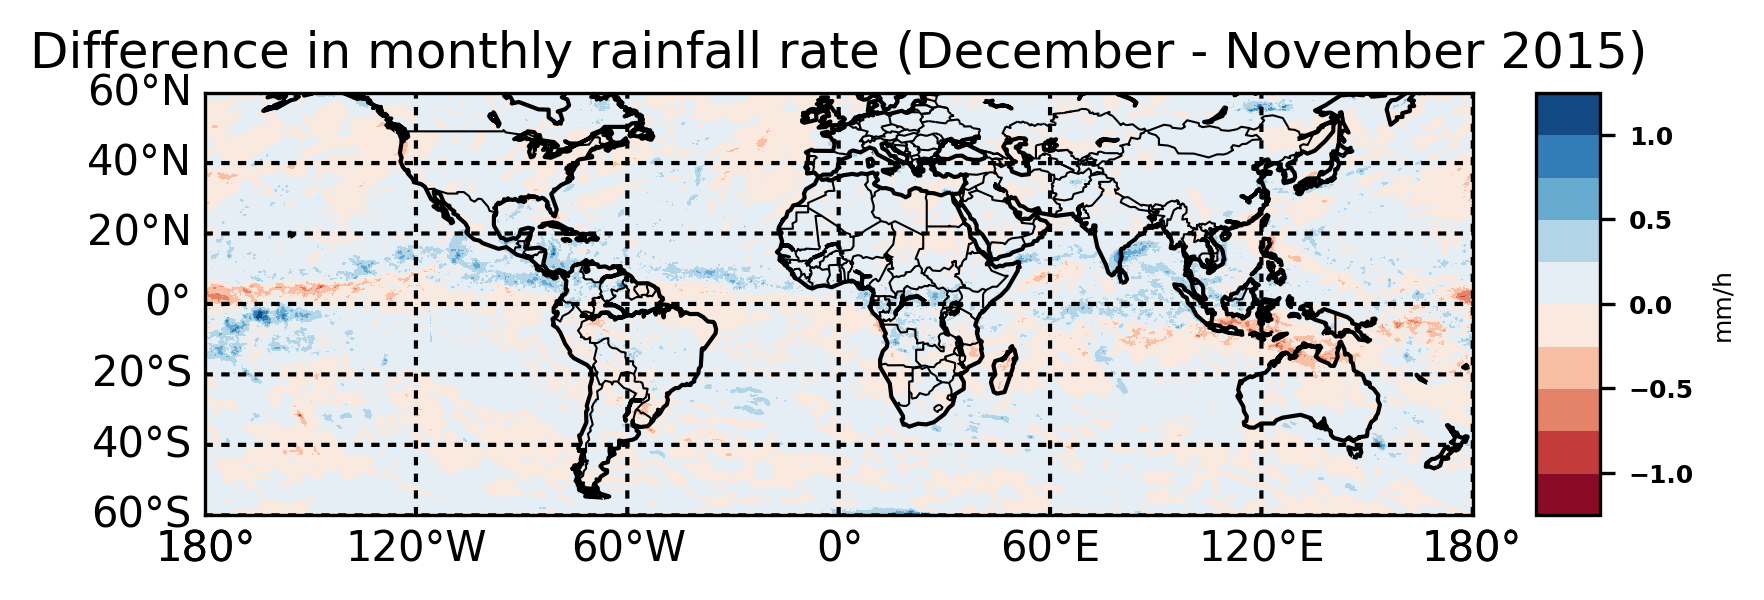

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
precipDifference(file1 = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151201-S000000-E235959.12.V03D.HDF5"\
           , file2 = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151101-S000000-E235959.11.V03D.HDF5"\
          , title_name = "Difference in monthly rainfall rate (December - November 2015)", \
          figure_path = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/diff-ex.png")